In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [4]:
train_path = "../data/Teeth_Dataset/Training"
val_path = "../data/Teeth_Dataset/Validation"
import os


print("Training path exists:", os.path.exists(train_path))
print("Validation path exists:", os.path.exists(val_path))


Training path exists: True
Validation path exists: True


In [5]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(train_path,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

val_ds = val_datagen.flow_from_directory(val_path,
                                         target_size=(224, 224),
                                         batch_size=32,
                                         class_mode='categorical')


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [7]:
# After loading the dataset
print("Class Indices (name -> index):")
print(train_ds.class_indices)

# Optional: Save ordered class names
ordered_class_names = list(train_ds.class_indices.keys())
print("Ordered Class Names:", ordered_class_names)


Class Indices (name -> index):
{'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}
Ordered Class Names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [18]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  


In [19]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax') 
])


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=10,batch_size=32)


Epoch 1/10
 4/97 ━━━━━━━━━━━━━━━━━━━━ 4:55 3s/step - accuracy: 0.1523 - loss: 2.4822

KeyboardInterrupt: 

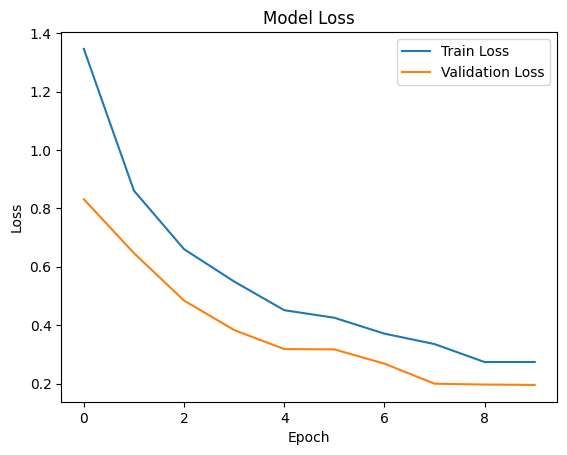

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_ds = test_datagen.flow_from_directory(
    '../data/Teeth_Dataset/Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 1028 images belonging to 7 classes.


In [ ]:
loss, acc = model.evaluate(test_ds)
print(f"Validation Accuracy: {acc:.2f}")
print(f"Validation Loss: {loss:.4f}")


c:\Users\digital\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9583 - loss: 0.1305
Validation Accuracy: 0.94
Validation Loss: 0.1786
